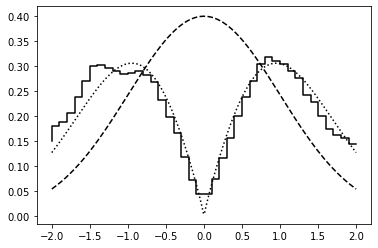

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
bins=np.zeros(shape=(41))

samples=[]
with tf.compat.v1.Session() as sess:
    optimizer_kernel = tfp.optimizer.StochasticGradientLangevinDynamics(
          learning_rate=0.0001, preconditioner_decay_rate=0.9,diagonal_bias=1e-08)


    var_1 = tf.Variable(name='var_1', initial_value=[1.])
    def loss_fn():

        return 0.5*var_1**2
    
    optimizer_kernel.iterations = tf.Variable(0, dtype=tf.int64)
    optimizer = optimizer_kernel.minimize(loss_fn, var_list=[var_1])
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(10000000):
        sess.run(optimizer)
        sample = sess.run(var_1)
        bin_int=int(sample*10)
            # Correcting for int rounding up below zero and down above zero   
        if sample<0:
             bin_int+=20
        else:
             bin_int+=21
        if bin_int>=0 and bin_int<41:
            bins[bin_int]+=1


import matplotlib.pyplot as plt
axis=np.linspace(-2,2,41)
est_dens=bins/(10000000*0.1)
fine_axis=np.linspace(-2,2,400)
pred_dens=1.258/(2*3.141593)**0.5*(1e-8+np.abs(fine_axis))**0.9*np.exp(-0.5*fine_axis**2)
target_dens=1/(2*3.141593)**0.5*np.exp(-0.5*fine_axis**2)
plt.step(axis, est_dens,label=r'$\hat{\pi}(\theta)$',color='black')
plt.plot(fine_axis,pred_dens,label=r'$\pi(\theta)$',color='black',linestyle='dotted')
plt.plot(fine_axis,target_dens,label=r'$p(\theta|D)$',color='black',linestyle='dashed')
#plt.legend()